# Empirical Asset Pricing A 2021
## Homework 3: on empirical tests for conditional CAPM
**Xinyu Liu, INSEAD**

**30.01.2021**

## Overview

The goal of this exercise is to get a sense of the testing procedures in conditional CAPM.

## Preparation: Import packages and access data


In [150]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
#pip install pandas-datareader (in case you haven't install this package)
from pandas_datareader.famafrench import get_available_datasets
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import statsmodels.api as sm
import scipy as sp
from dateutil.relativedelta import relativedelta
import datapungibea as dpb
# print latex 
# from IPython.display import display, Math

In [151]:
###########################
# Fama French Factor Grabber
###########################
#https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/
#Please refer to this link if you have any further questions.

#You can extract all the available datasets from Ken French's website and find that there are 297 of them. We can opt to see all the datasets available.
datasets = get_available_datasets()
print('No. of datasets:{}'.format(len(datasets)))
#datasets # comment out if you want to see all the datasets

No. of datasets:297


In [152]:
###########################
#Customize your data selection
###########################
#It is important to check the description of the dataset we access by using the following codes 
sdate='1969-01-01'
edate='2018-12-31'

#### For $M kt-Rf, SMB, HML$ Factors:

In [153]:
Datatoread='F-F_Research_Data_Factors'
ds_factors = web.DataReader(Datatoread,'famafrench',start=sdate,end=edate) # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {}'.format(ds_factors['DESCR']))
#From the printed information we know that we need to select the "0" name in the dictionary
#copy the right dict for later examination
dfFactor = ds_factors[0].copy()
# 0 for monthly data and 1 for yearly data
dfFactor.reset_index(inplace=True)

#Date format adjustment
# dfFactor['Date']=dfFactor['Date'].dt.strftime('%Y-%m')
dfFactor = dfFactor.set_index(['Date'])
dfFactor.index=dfFactor.index.to_timestamp()
# dfFactor['Date']=dfFactor['Date'].dt.to_timestamp(freq='M').dt.strftime('%Y-%m')
#Obtained object dtype
# dfFactor.index=pd.to_datetime(dfFactor.index)
#Obtained dt64, which is needed for the plotting

RF = dfFactor['RF']
# dfFactor=dfFactor.drop(columns = ['RF'])
# I check the scale of the data by printing out the head:
dfFactor.head()


KEYS
dict_keys([0, 1, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202012 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2020 Kenneth R. French

  0 : (600 rows x 4 cols)
  1 : Annual Factors: January-December (50 rows x 4 cols)


,Mkt-RF,SMB,HML,RF
Date,,,,
1969-01-01,-1.25,-0.77,1.66,0.53
1969-02-01,-5.84,-3.90,0.86,0.46
1969-03-01,2.64,-0.26,-0.52,0.46
1969-04-01,1.46,-0.87,-0.03,0.53
1969-05-01,-0.10,-0.26,0.71,0.48


#### For 25 portfolios formed on size and book-to-market (5 x 5)

In [154]:
# I searched for the exact name for this portfolio set by methods mentioned above
#It is important to check the description of the dataset we access by using the following codes 
Datatoread_PORT='25_Portfolios_5x5'
ds_PORT = web.DataReader(Datatoread_PORT,'famafrench',start=sdate,end=edate) # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{}'.format(ds_PORT.keys()))
print('DATASET DESCRIPTION \n {}'.format(ds_PORT['DESCR']))
#From the printed information we know that we need to select the "0" name in the dictionary
#copy the right dict for later examination
dfPORT = ds_PORT[0].copy()
dfPORT.reset_index(inplace=True)

dfPORT = dfPORT.set_index(['Date'])
# I check the scale of the data by printing out the head:
dfPORT.head()


KEYS
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'DESCR'])
DATASET DESCRIPTION 
 25 Portfolios 5x5
-----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202012 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (600 rows x 25 cols)
  1 : Average Equal Weighted Returns -- Monthly (600 rows x 25 cols)
  2 : Average Value Weighted Returns -- Annual (50 rows x 25 cols)
  3 : Average Equal Weighted Returns -- Annual (50 rows x 25 cols)
  4 : Number of Firms in

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1969-01,-0.4025,-2.2335,-1.7802,-1.5544,-1.3196,-2.8461,-0.7510,-1.8779,1.5990,0.6508,...,-2.0630,0.2514,-0.2464,-0.2079,1.2718,-2.1638,-0.4018,0.9410,-0.3636,1.3852
1969-02,-12.4494,-10.5555,-9.2350,-8.5046,-8.8238,-10.7773,-8.4455,-5.2539,-7.0363,-7.4922,...,-8.2546,-6.9780,-5.3009,-7.2757,-8.7325,-3.2461,-3.4666,-4.9663,-4.6013,-6.1950
1969-03,3.2010,2.4528,3.7361,3.7708,2.3997,4.2086,1.6967,2.0297,0.4698,5.4560,...,4.3715,-2.1228,2.5373,1.7028,3.5591,4.2629,2.7424,3.8643,1.9452,4.7621
1969-04,1.2235,-0.7933,1.8274,1.7605,-0.0206,1.7189,1.0909,0.7837,-0.5958,4.8097,...,2.9046,2.1104,0.4730,-0.4131,1.7164,3.7428,0.9610,1.0659,3.0219,0.7321
1969-05,1.0563,0.8531,0.6944,1.2134,0.3662,-1.8038,-1.8784,-0.8601,0.0315,0.5312,...,-0.1192,-0.6338,1.2612,1.0169,-2.4691,-0.4712,0.5298,1.0587,1.4482,0.4455


#### For monthly time-series of the default spread (”Baa - Aaa”)

In [155]:
from fredapi import Fred
fred = Fred(api_key='a92c0ce5eac17974829aaaf26e203db6')
Aaa = fred.get_series_latest_release('AAA')
Baa = fred.get_series_latest_release('BAA')

Bond_spread = pd.DataFrame({'Aaa':Aaa.values,'Baa':Baa.values},index = Aaa.index)
Bond_spread = Bond_spread[(Bond_spread.index<=pd.to_datetime(edate)) & (Bond_spread.index>=pd.to_datetime(sdate))]
Bond_spread['Spread'] = Bond_spread['Baa']- Bond_spread['Aaa']
dfFactor = dfFactor.merge(Bond_spread[['Spread']], how='inner', left_index=True, right_index=True)

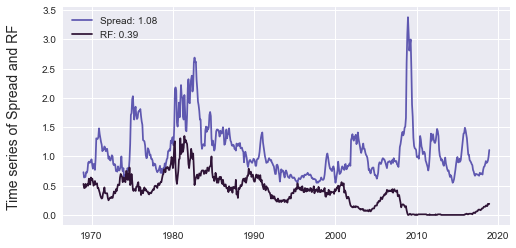

In [156]:
def portfolio_plot(df, num_subplot, plot_name='testing' ,figsize=(8,8), cmap ='twilight'):
    n = num_subplot
    fig, axes = plt.subplots(n,1,figsize=figsize,sharex=True,sharey=True)

    # fig.suptitle('Time series of relevant variables',fontsize=16)
    # Add an origin point at the top of the dataframe
    dfcopy = df.copy()
#     dfcopy.index = dfcopy.index.to_timestamp()
#     origin = dfcopy.index[0]-relativedelta(months=1)
#     dfcopy.loc[origin,:] = [1]*len(dfcopy.columns)
#     dfcopy=dfcopy.sort_index()

    dfFactor_cum = dfcopy
    for k,factortitle in enumerate(dfcopy.columns):
        if n==1:
            ax = axes
        else:
            ax = axes[k//n]
        ax.plot(dfFactor_cum.index,dfFactor_cum[factortitle], label='{}: {:.2f}'.format(factortitle, dfFactor_cum[factortitle].mean()))
        ax.xaxis.set_major_formatter(years_fmt)
        colormap = plt.cm.get_cmap(cmap)   
        colors = [colormap(i) for i in np.linspace(0.3, 0.5,len(ax.lines))]
        for i,j in enumerate(ax.lines):
            j.set_color(colors[i])
        ax.legend(fontsize = 10,loc=2)
    fig.text(0.04, 0.5, 'Time series of ' +plot_name, va='center', ha='center',rotation='vertical',fontsize = 14)
    plt.savefig("Time series of "+plot_name)
    plt.show()
portfolio_plot(dfFactor[['Spread', 'RF']], 1, plot_name='Spread and RF' ,figsize=(8,4), cmap ='twilight')

#### For monthly time-series of labor income growth (BEA)

In [271]:
BEA_data = dpb.data('FDA2D756-CC0A-4AAA-A1D5-980FA23F31BB') #or data = dpb.data("API Key")
NIPA_cons=BEA_data.NIPA('T20600',frequency='M')
#Download annual consumption data on nondurable goods from Table 2.6. 
#on “Personal Income and Its Disposition, Monthly”
NIPA_cons.reset_index(inplace=True)
Compensation_data=NIPA_cons[NIPA_cons['LineDescription']=='-Compensation of employees']
Compensation_data = Compensation_data.T.iloc[4:,:]
Compensation_data.columns=['Compensation']
Compensation_data.index = pd.to_datetime(Compensation_data.index.values, format='%YM%m')
Compensation_data['Income Growth'] = (Compensation_data['Compensation']-Compensation_data['Compensation'].shift(1))/Compensation_data['Compensation'].shift(1)
# Convert strings to datetime 
Compensation_data = Compensation_data[(Compensation_data.index<=pd.to_datetime(edate)) & (Compensation_data.index>=pd.to_datetime(sdate))]
Compensation_data['Mkt-RF'] = dfFactor['Mkt-RF']/100
Compensation_data['Income Growth'] = Compensation_data['Income Growth']
labor_market = (Compensation_data[['Income Growth','Mkt-RF']]+1).astype('f').resample('Y').prod()-1
portfolio_plot(labor_market, 1, plot_name='Income Growth and Mkt-RF (monthly)' ,figsize=(8,4), cmap ='twilight')
dfFactor['Labor'] = Compensation_data['Income Growth'].astype('f')*100
# I don't know why but the api is not stable so I kept a copy of data 
# Compensation_data.to_pickle('compensation')

KeyError: 'Results'

In [220]:
Compensation_data = pd.read_pickle('compensation')
dfFactor['Labor'] = Compensation_data['Income Growth'].astype('f')*100

## Test functions 
#### Define the function for conducting cross-sectional test

In [252]:
def FamaMacbeth_Test(factor_matrix, test_assets, RF):
#     test_assets.index = test_assets.index.to_timestamp()
    # Step one, time series regression, obtain estimated beta for each portfolio
    X = sm.add_constant(factor_matrix)
    beta_matrix = pd.DataFrame()
    for i in range(len(test_assets.columns)):
        y= test_assets.iloc[:,i]-RF
        model = sm.OLS(y, X)
        results = model.fit()
        beta_i = pd.DataFrame(results.params[1:]).T
        beta_matrix= pd.concat([beta_matrix, beta_i])
    beta_matrix.index = test_assets.columns

    # Step two, cross sectional regression, obtain estimated intercept and factor risk premium period by period
    X = sm.add_constant(beta_matrix)
    premium_matrix = pd.DataFrame()
    rsquare_matrix = []
    for i in range(len(test_assets.index)):
        # Note to be consisitent we should still use the excess return
        y= test_assets.iloc[i,:]-RF[i]
        model = sm.OLS(y, X)
        results = model.fit()
        premium_i = pd.DataFrame(results.params).T
        premium_matrix= pd.concat([premium_matrix, premium_i])
        
        rsquare_matrix.append(results.rsquared_adj)
    premium_matrix.index = factor_matrix.index
    
    ## Key formula to calculate the statistics
    point_estimate = premium_matrix.mean()
    N = len(test_assets.index)
    std = premium_matrix.std()/np.sqrt(N)
    df = N-1
    significant_level = 0.975
    critical_value = sp.stats.t.ppf(significant_level, df)
    CI = [point_estimate-std*critical_value, point_estimate+std*critical_value]
    reports = pd.DataFrame(point_estimate).T
    reports = reports.rename(index={0:'FM coef'})
    reports.loc['t-stats',:]= reports.iloc[0,:]/std

    print(reports.round(2).to_latex())
    return beta_matrix, premium_matrix, point_estimate, rsquare_matrix

In [253]:
beta_matrix, premium_matrix, point_estimate, rsquare_mean = FamaMacbeth_Test(dfFactor[['Mkt-RF', 'Spread','Labor']], dfPORT, RF)

\begin{tabular}{lrrrr}
\toprule
{} &  const &  Mkt-RF &  Spread &  Labor \\
\midrule
FM coef &   1.65 &   -1.04 &    0.34 &  -0.00 \\
t-stats &   4.39 &   -2.65 &    2.85 &  -0.02 \\
\bottomrule
\end{tabular}



In [286]:
# Sensitivity check for the parameters
cut = 240
beta_matrix, premium_matrix, point_estimate, rsquare_mean = FamaMacbeth_Test(dfFactor[['Mkt-RF', 'Spread','Labor']].iloc[:cut,:], dfPORT.iloc[:cut,:], RF[:cut])

\begin{tabular}{lrrrr}
\toprule
{} &  const &  Mkt-RF &  Spread &  Labor \\
\midrule
FM coef &   1.23 &   -0.86 &    0.31 &  -0.02 \\
t-stats &   2.55 &   -1.51 &    2.49 &  -0.21 \\
\bottomrule
\end{tabular}



In [254]:
# Rolling average calcualtion for list data
numbers = rsquare_mean
window_size = 120
numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

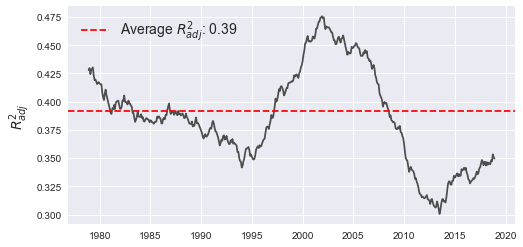

In [269]:
# plot time series of rolling average
fig, axes = plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
fig.text(0.04, 0.5, r'$R^2_{adj}$', va='center', ha='center',rotation='vertical',fontsize = 14)
colormap = plt.cm.get_cmap('twilight') 
axes.plot(dfPORT.index[window_size - 1:],without_nans,c=".3")
axes.axhline(y=np.mean(rsquare_mean),color='r', linestyle='--',label='Average '+r'$R^2_{adj}$'+': {}'.format(np.round(np.mean(rsquare_mean),2)))
axes.legend(fontsize = 14)
plt.plot()
plt.savefig('Rsquared')
plt.show()

In [223]:
# Make the output table more readable
beta_matrix = beta_matrix.round(2)
for content in beta_matrix.T.index:
    print_report = pd.DataFrame(beta_matrix.T.loc[content,:].values.reshape(5,5),columns= ["BM" + str(i+1) for i in range(5)], index= ["ME" + str(i+1) for i in range(5)])
    print_report = pd.concat([print_report], axis=1, keys=[content])
    print(print_report.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{Mkt-RF} \\
{} &    BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &   1.41 &  1.23 &  1.09 &  1.01 &  1.04 \\
ME2 &   1.39 &  1.17 &  1.05 &  0.99 &  1.11 \\
ME3 &   1.32 &  1.12 &  1.00 &  0.96 &  1.04 \\
ME4 &   1.23 &  1.09 &  1.00 &  0.95 &  1.07 \\
ME5 &   0.98 &  0.94 &  0.86 &  0.88 &  0.94 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{Spread} \\
{} &    BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &   0.61 &  0.56 &  0.82 &  0.42 &  0.43 \\
ME2 &   0.46 &  0.67 &  0.58 &  0.51 &  0.20 \\
ME3 &   0.43 &  0.64 &  0.42 &  0.47 &  0.39 \\
ME4 &   0.17 &  0.38 &  0.21 &  0.23 &  0.07 \\
ME5 &  -0.15 &  0.00 & -0.27 & -0.46 & -0.13 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{Labor} \\
{} &   BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &  0.56 &  0.33 &  0.37 &  0.35 &  0.41 \\
ME2 &  0.09 &  0.11 &  0.05 &  0.36 &  0.30 \\
ME

In [229]:
# Process result from regressions to plot scatter plot
X = sm.add_constant(beta_matrix)
Estimated = X @ point_estimate
Realized = (dfPORT.sub(RF,axis = 'index')).mean()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

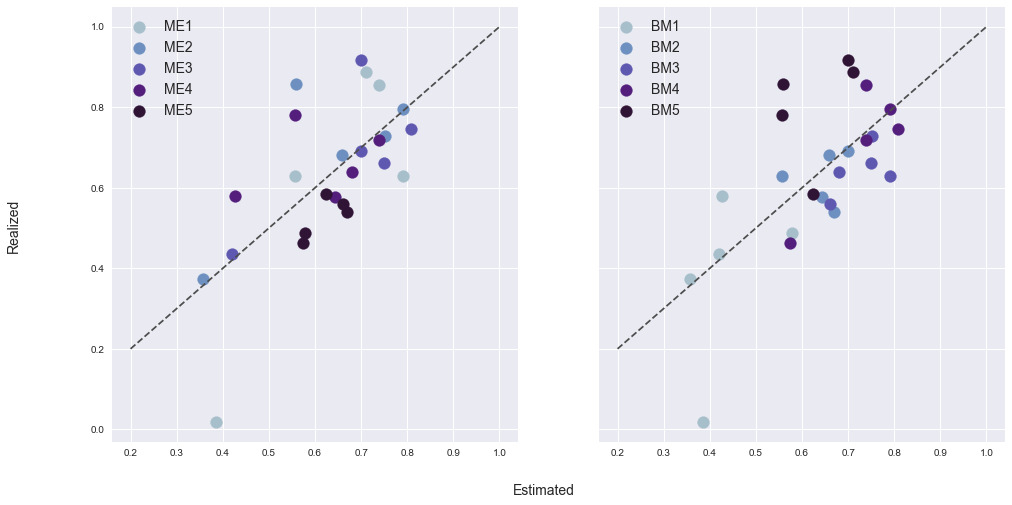

In [263]:
# Make the scatter plot 
fig, axes = plt.subplots(1,2,figsize=(16,8),sharex=True,sharey=True)
fig.text(0.04, 0.5, 'Realized', va='center', ha='center',rotation='vertical',fontsize = 14)
fig.text(0.5,0.04, 'Estimated', va='center', ha='center',rotation='horizontal',fontsize = 14)
colormap = plt.cm.get_cmap('twilight') 
colors = [colormap(i) for i in np.linspace(0.1, 0.5,5)]
axes[0].plot([0.2, 1], [0.2, 1], ls="--", c=".3")
for i in range(0,5):
    axes[0].scatter(Estimated[i*5:(i+1)*5],Realized[i*5:(i+1)*5],c=colors[i],label = 'ME'+str(i+1), s=140)
axes[0].legend(fontsize = 14)
axes[1].plot([0.2, 1], [0.2, 1], ls="--", c=".3")
for i in range(0,5):
    axes[1].scatter(Estimated[i::5],Realized[i::5],c=colors[i],label = 'BM'+str(i+1), s=140)
axes[1].legend(fontsize = 14)
plt.plot()
plt.savefig('Scatter')
plt.show()
